[[0.49611111 0.15422222]] [[0.57375 0.27875]]
[[ 0.30332289 -0.05006522]
 [-0.05006522  0.09295756]] [[0.1168675 0.0718285]
 [0.0718285 0.0712995]]
[[-0.14650982]
 [-0.73871557]]


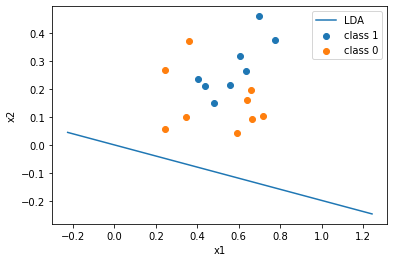

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def getDataSet():
    """
    get watermelon data set 3.0 alpha.
    :return: (feature array, label array)
    """
    dataSet = np.array([
        [0.697, 0.460, 1],
        [0.774, 0.376, 1],
        [0.634, 0.264, 1],
        [0.608, 0.318, 1],
        [0.556, 0.215, 1],
        [0.403, 0.237, 1],
        [0.481, 0.149, 1],
        [0.437, 0.211, 1],
        [0.666, 0.091, 0],
        [0.243, 0.267, 0],
        [0.245, 0.057, 0],
        [0.343, 0.099, 0],
        [0.639, 0.161, 0],
        [0.657, 0.198, 0],
        [0.360, 0.370, 0],
        [0.593, 0.042, 0],
        [0.719, 0.103, 0]
    ])

    # # insert number 1 before column 0.
    # e.g: dataSet[0] = [1, 0.697, 0.460, 1]
    # dataSet = np.insert(dataSet, 0,
    #                     np.ones(dataSet.shape[0]),
    #                     axis=1)
    dataArr = dataSet[:, :-1]
    labelArr = dataSet[:, -1]
    return dataArr, labelArr


def LDA(dataArr, labelArr):
    """
    Linear Discriminant Analysis
    :param dataArr:
    :param labelArr:
    :return: parameter w
    """
    # 0,1两类数据分开
    data1 = dataArr[labelArr == 1]
    data0 = dataArr[labelArr == 0]
    # 求得两类数据的均值向量
    mean0 = data0.mean(axis=0, keepdims=True)
    mean1 = data1.mean(axis=0, keepdims=True)
    print(mean0, mean1)
    # 得到两种数据的协方差矩阵
    diff1 = data1 - mean1
    diff0 = data0 - mean0
    cov1 = np.dot(diff1.T, diff1)
    cov0 = np.dot(diff0.T, diff0)
    print(cov0, cov1)
    # 得到“类内散度矩阵”
    sw = cov1 + cov0
    # 求得参数w
    swInv = np.linalg.inv(sw)
    w = np.dot(swInv, mean0.T - mean1.T)
    return w


def main():
    # test LDA()
    dataArr, labelArr = getDataSet()
    w = LDA(dataArr, labelArr)
    print(w)
    # plot data points
    data1 = dataArr[labelArr == 1]
    data0 = dataArr[labelArr == 0]
    plt.scatter(data1[:, 0], data1[:, 1], label="class 1")
    plt.scatter(data0[:, 0], data0[:, 1], label="class 0")
    plt.xlabel("x1")
    plt.ylabel("x2")
    # plot line
    w = w.flatten()
    maxX1 = dataArr[:, 0].max()
    minX1 = dataArr[:, 0].min()
    x1 = np.linspace(maxX1-1, minX1+1, 102)
    x2 = -w[0] * x1 / w[1]
    plt.plot(x1, x2, label="LDA")

    plt.legend()
    plt.show()


if __name__ == '__main__':
    main()
